In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.statespace.sarimax import SARIMAX
from statsmodels.tsa.stattools import adfuller
from google.colab import files

In [14]:
df = pd.read_csv('sample_data/DateSales.csv')
df.head()


,Date,Sales
0,2020-01-01,200
1,2020-02-01,220
2,2020-03-01,180
3,2020-04-01,250
4,2020-05-01,270


In [15]:
df['Date'] = pd.to_datetime(df['Date'])
df.set_index('Date', inplace=True)
df = df.asfreq('MS')  # MS = Month Start
df.head()

#preparing data

,Sales
Date,
2020-01-01,200
2020-02-01,220
2020-03-01,180
2020-04-01,250
2020-05-01,270


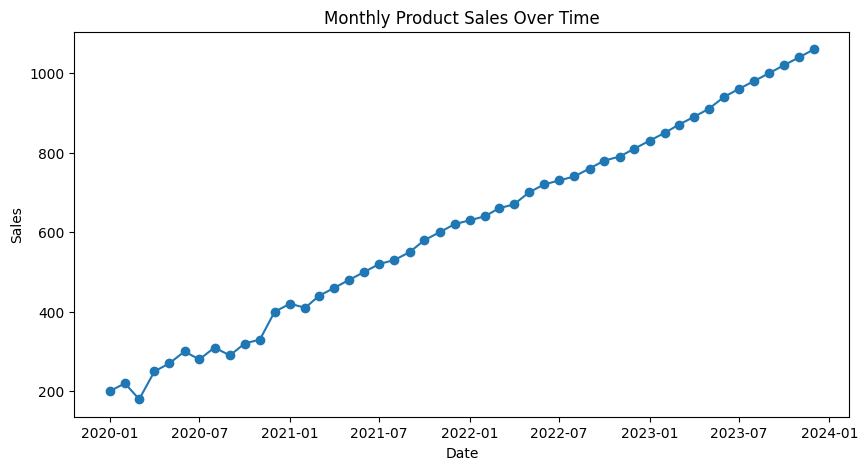

In [16]:
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], marker='o')
plt.title('Monthly Product Sales Over Time')
plt.xlabel('Date')
plt.ylabel('Sales')
plt.show()

In [17]:
result = adfuller(df['Sales'])
print('ADF Statistic:', result[0])
print('p-value:', result[1])

ADF Statistic: 1.248213997938507
p-value: 0.9963026407320763


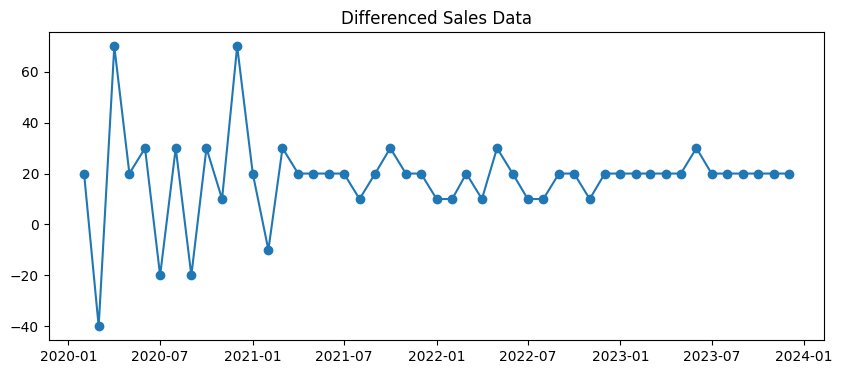

In [18]:
df['Sales_diff'] = df['Sales'].diff().dropna()

plt.figure(figsize=(10,4))
plt.plot(df['Sales_diff'], marker='o')
plt.title('Differenced Sales Data')
plt.show()

In [20]:
model = SARIMAX(df['Sales'], order=(1,1,1), seasonal_order=(1,1,1,12))
results = model.fit()

print(results.summary())


/usr/local/lib/python3.12/dist-packages/statsmodels/tsa/statespace/sarimax.py:866: UserWarning: Too few observations to estimate starting parameters for seasonal ARMA. All parameters except for variances will be set to zeros.
  warn('Too few observations to estimate starting parameters%s.'


                                     SARIMAX Results                                      
Dep. Variable:                              Sales   No. Observations:                   48
Model:             SARIMAX(1, 1, 1)x(1, 1, 1, 12)   Log Likelihood                -151.786
Date:                            Sun, 02 Nov 2025   AIC                            313.573
Time:                                    10:05:47   BIC                            321.349
Sample:                                01-01-2020   HQIC                           316.257
                                     - 12-01-2023                                         
Covariance Type:                              opg                                         
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
ar.L1         -0.0039      0.269     -0.014      0.989      -0.531       0.523
ma.L1         -0.6017      0.218   

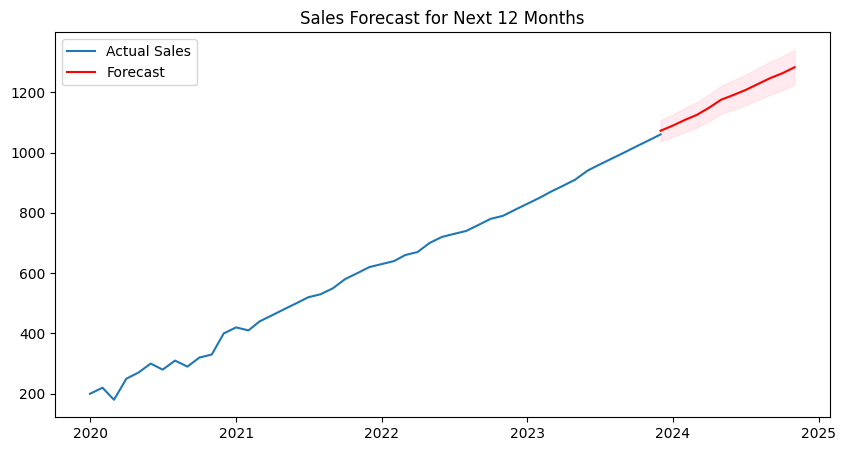

In [21]:
forecast = results.get_forecast(steps=12)
pred_conf = forecast.conf_int()

forecast_index = pd.date_range(start=df.index[-1], periods=12, freq='MS')

# Plot
plt.figure(figsize=(10,5))
plt.plot(df['Sales'], label='Actual Sales')
plt.plot(forecast_index, forecast.predicted_mean, label='Forecast', color='red')
plt.fill_between(forecast_index, pred_conf.iloc[:,0], pred_conf.iloc[:,1], color='pink', alpha=0.3)
plt.title('Sales Forecast for Next 12 Months')
plt.legend()
plt.show()

In [22]:
future_df = pd.DataFrame({
    'Date': forecast_index,
    'Predicted_Sales': forecast.predicted_mean
})
future_df.to_csv('sales_forecast.csv', index=False)
files.download('sales_forecast.csv')

<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>